# Quantum Entanglement circuito

In [3]:
# No olvidar que en "Google colab" hay que instalar qiskit

########################
# Instala versión 0.45.2
########################
# Importante, poner qiskit-aer en la misma linea de "pip install" para que coja la versión adecuada
try:
    import google.colab
    print("In colab, let's install things...")
    #
    !pip install qiskit[visualization]==0.45.2 qiskit-aer qiskit-ibm-runtime ipywidgets
except ImportError:
    print("NOT in colab")

In colab, let's install things...
INFO: pip is looking at multiple versions of qiskit-aer to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of qiskit-ibm-runtime to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of qiskit-ibm-runtime to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 72.8

In [5]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import transpile
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import QFT
import numpy as np
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


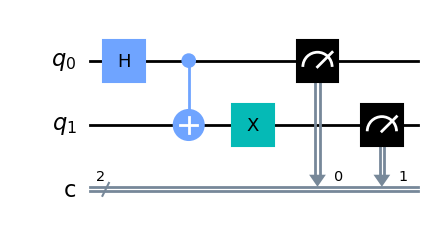

In [8]:
#Vamos a representar el estado de Bell 1/sqrt(2) ( |01> + |10>)
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.x(qreg_q[1])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.draw('mpl')

Este circuito nos prepara el estado de Bell $|{\Psi}^+\rangle = \frac{1}{\sqrt{{2}}} ( |01\rangle+|10\rangle)$. Vamos a hacer mediciones de ambos qubits mediante un simulador de Qiskit.

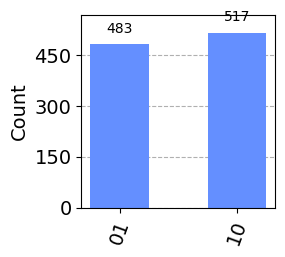

In [9]:
# Generamos una instancia del simulador;
# con "method" le especificamos el método de simulación
# Change the method to 'qasm_simulator' to get counts
simulador = AerSimulator(method='statevector')

# Transpilamos
circuit_t = transpile(circuit, backend=simulador)

# Ejecutamos la simulación, con un buen número de repeticiones
# (shots = 1000), ya que tenemos un medidor
job = simulador.run(circuit_t, shots=1000)
result = job.result()

counts = result.get_counts()
fig = plot_histogram(counts, figsize=(2.5, 2.5))
display(fig)

In [10]:
counts

{'10': 517, '01': 483}

# Conclusión
Las únicas mediciones que hemos obtenido son $|01>$ y $|10>$ con aproximadamente 50% de probabilidad de obtener cada una de ellas.

Lo que se traduce como que el primer qubit, despues de haber hecha la medición, tiene un 50% de ser $0$ o $1$. En cada uno de esos casos, el segundo qubit esta condicionado a ser el opuesto, $1$ o $0$ respectivamente.